In [1]:
import pdfplumber
import re
from collections import OrderedDict

In [4]:
file = 'cir209.pdf'
#file = input("Enter filename:")
pdf = pdfplumber.open(file)

In [77]:
n = 1 # page number
p0 = pdf.pages[n-1]

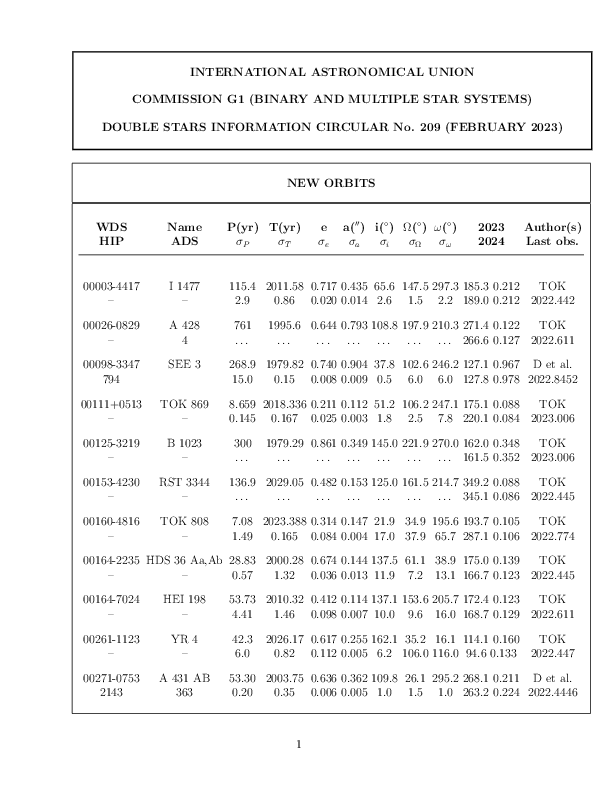

In [78]:
#for i in range(7):
im = p0.to_image()
im

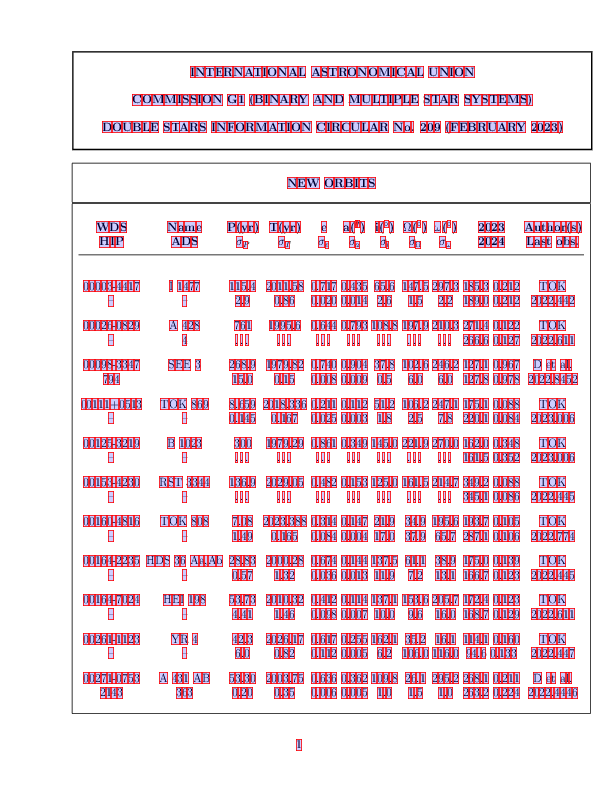

In [79]:
im.reset().draw_rects(p0.chars)

In [80]:
#for i in range(8):
text = p0.extract_text(x_tolerance=2)
print(text)
print("Length =",len(text))
end = len(text)
print(text[-11:])

INTERNATIONAL ASTRONOMICAL UNION
COMMISSION G1 (BINARY AND MULTIPLE STAR SYSTEMS)
DOUBLE STARS INFORMATION CIRCULAR No. 209 (FEBRUARY 2023)
NEW ORBITS
WDS Name P(yr) T(yr) e a((cid:48)(cid:48)) i(◦) Ω(◦) ω(◦) 2023 Author(s)
HIP ADS σ σ σ σ σ σ σ 2024 Last obs.
P T e a i Ω ω
00003-4417 I 1477 115.4 2011.58 0.717 0.435 65.6 147.5 297.3 185.3 0.212 TOK
– – 2.9 0.86 0.020 0.014 2.6 1.5 2.2 189.0 0.212 2022.442
00026-0829 A 428 761 1995.6 0.644 0.793 108.8 197.9 210.3 271.4 0.122 TOK
– 4 ... ... ... ... ... ... ... 266.6 0.127 2022.611
00098-3347 SEE 3 268.9 1979.82 0.740 0.904 37.8 102.6 246.2 127.1 0.967 D et al.
794 15.0 0.15 0.008 0.009 0.5 6.0 6.0 127.8 0.978 2022.8452
00111+0513 TOK 869 8.659 2018.336 0.211 0.112 51.2 106.2 247.1 175.1 0.088 TOK
– – 0.145 0.167 0.025 0.003 1.8 2.5 7.8 220.1 0.084 2023.006
00125-3219 B 1023 300 1979.29 0.861 0.349 145.0 221.9 270.0 162.0 0.348 TOK
– – ... ... ... ... ... ... ... 161.5 0.352 2023.006
00153-4230 RST 3344 136.9 2029.05 0.482 0.153 125.0 1

In [81]:
core_st_pat = re.compile(r"P T e a i Ω ω")
core_en_pat = re.compile(r"TOK = TOKOVININ")
#core_en_pat = re.compile(r"2018.9727")
#core_en_pat = text[-11:-2]

In [82]:
core_st = re.search(core_st_pat, text)
start = int(core_st.end()+1.)
print(start)

275


In [83]:
core_end = re.search(core_en_pat,text)
#print(core_end.group(0))
#end = int(core_end.start())
end = len(text)-1
print(end)

1786


In [84]:
core = text[start:end-1]

In [85]:
print(core) #[0:22]+'... to ...'+core[-20:-1])

00003-4417 I 1477 115.4 2011.58 0.717 0.435 65.6 147.5 297.3 185.3 0.212 TOK
– – 2.9 0.86 0.020 0.014 2.6 1.5 2.2 189.0 0.212 2022.442
00026-0829 A 428 761 1995.6 0.644 0.793 108.8 197.9 210.3 271.4 0.122 TOK
– 4 ... ... ... ... ... ... ... 266.6 0.127 2022.611
00098-3347 SEE 3 268.9 1979.82 0.740 0.904 37.8 102.6 246.2 127.1 0.967 D et al.
794 15.0 0.15 0.008 0.009 0.5 6.0 6.0 127.8 0.978 2022.8452
00111+0513 TOK 869 8.659 2018.336 0.211 0.112 51.2 106.2 247.1 175.1 0.088 TOK
– – 0.145 0.167 0.025 0.003 1.8 2.5 7.8 220.1 0.084 2023.006
00125-3219 B 1023 300 1979.29 0.861 0.349 145.0 221.9 270.0 162.0 0.348 TOK
– – ... ... ... ... ... ... ... 161.5 0.352 2023.006
00153-4230 RST 3344 136.9 2029.05 0.482 0.153 125.0 161.5 214.7 349.2 0.088 TOK
– – ... ... ... ... ... ... ... 345.1 0.086 2022.445
00160-4816 TOK 808 7.08 2023.388 0.314 0.147 21.9 34.9 195.6 193.7 0.105 TOK
– – 1.49 0.165 0.084 0.004 17.0 37.9 65.7 287.1 0.106 2022.774
00164-2235 HDS 36 Aa,Ab 28.83 2000.28 0.674 0.144 137.5

In [66]:
lines = core.split("\n")
line_groups = list(zip(lines[::2],lines[1::2]))
print(line_groups[0])
#print(line_groups[4])

('06237-3319 TOK 823Aa,Ab 4.65 2022.097 0.674 0.043 133.2 27.0 163.2 261.7 0.012 TOK', '30410 – 0.30 0.028 0.027 0.001 5.6 8.5 14.2 69.3 0.042 2022.195')


In [67]:
def split(strelem,lnum,rnum):
    tmpstr = strelem.split('.',)
    if len(tmpstr) == 2.:
        newstr = str.rjust(tmpstr[0],lnum)+'.'+str.ljust(tmpstr[1],rnum)
    else:
        strpad = ' '*rnum
        newstr = str.rjust(tmpstr[0],lnum)+'.'+strpad
    return newstr
    print(newstr)

In [82]:
#with open('circ2cat.py.out') as f:

HD = '.     '
ephem = '2021-22'

for i in line_groups:
    elements = str.split(i[0])+str.split(i[1])
#     print(elements, '=', len(elements))
    
    if len(elements) < 25:
        print('bad')
    else:
        WDS = str.ljust(elements[0],10)
        comps = elements[3].split(',')
        if comps[0].isalpha() == True:
            Name = str.ljust(elements[1],3) + str.rjust(elements[2],4) + str.ljust(elements[3],7)
            P = elements[4]
            T = elements[5]
            e = elements[6]
            a = elements[7]
            i = elements[8]
            N = elements[9]
            O = elements[10]
            eph1_pa = elements[11]
            eph1_sep = elements[12]
            Auth = elements[13]
            if len(Auth) == 1:
                Auth = str.ljust(elements[13],2)+elements[14]+str.rjust(elements[15],2)
                HIP = elements[16]
                ADS = elements[17]
                P_e = elements[18]
                T_e = elements[19]
                e_e = elements[20]
                a_e = elements[21]
                i_e = elements[22]
                N_e = elements[23]
                O_e = elements[24]
                eph2_pa = elements[25]
                eph2_sep = elements[26]
                last = float(elements[27])
            else:    
                HIP = elements[14]
                ADS = elements[15]
                P_e = elements[16]
                T_e = elements[17]
                e_e = elements[18]
                a_e = elements[19]
                i_e = elements[20]
                N_e = elements[21]
                O_e = elements[22]
                eph2_pa = elements[23]
                eph2_sep = elements[24]
                last = float(elements[25])
        else:
            Name = str.ljust(elements[1],3)+str.rjust(elements[2],4)+str('       ')
            P = elements[3]
            T = elements[4]
            e = elements[5]
            a = elements[6]
            i = elements[7]
            N = elements[8]
            O = elements[9]
            eph1 = elements[10]
            eph2 = elements[11]
            Auth = elements[12]
            if len(Auth) == 1:
                Auth = str.ljust(elements[12],2)+elements[13]+str.rjust(elements[14],2)
                HIP = elements[15]
                ADS = elements[16]
                P_e = elements[17]
                T_e = elements[18]
                e_e = elements[19]
                a_e = elements[20]
                i_e = elements[21]
                N_e = elements[22]
                O_e = elements[23]
                eph2_pa = elements[24]
                eph2_sep = elements[25]
                last = float(elements[26])
            else:
                HIP = elements[13]
                ADS = elements[14]
                P_e = elements[15]
                T_e = elements[16]
                e_e = elements[17]
                a_e = elements[18]
                i_e = elements[19]
                N_e = elements[20]
                O_e = elements[21]
                eph2_pa = elements[22]
                eph2_sep = elements[23]
                last = float(elements[24])

        if ADS.isnumeric() == False:
            ADS = str('.    ')
        else:
            ADS = str.ljust(ADS,5)
        if HIP.isnumeric() == False:
            print(HIP)
            HIP = str('.     ')
        else:
            HIP = str.ljust(HIP,6)

        if P_e == '...' or P_e == 'ﬁxed':
            P_e = '.'
        if T_e == '...' or T_e == 'ﬁxed':
            T_e = '.'
        if e_e == '...' or e_e == 'ﬁxed':
            e_e = '.'
        if a_e == '...' or a_e == 'ﬁxed':
            a_e = '.'
        if i_e == '...' or i_e == 'ﬁxed':
            i_e = '.'
        if N_e == '...' or N_e == 'ﬁxed':
            N_e = '.'
        if O_e == '...' or O_e == 'ﬁxed':
            O_e = '.'

        P = split(P,5,6)
        P_e = split(P_e,4,6)
        a = split(a,3,5)
        a_e = split(a_e,2,5)
        i = split(i,3,4)
        i_e = split(i_e,3,4)
        N = split(N,3,5)
        N_e = split(N_e,3,4)
        T = split(T,5,6)
        T_e = split(T_e,4,6)
        e = split(e,1,6)
        e_e = split(e_e,1,6)
        O = split(O,3,4)
        O_e = split(O_e,3,4)

        if Auth == 'TOK':
            ref = 'Tok2021?'
        if Auth == 'D & C':
            ref = 'Doc2021?'
        if Auth == 'D & L':
            ref = 'Doc2021?'

        png = 'wds'+WDS.lower()+'a.png'

        print(WDS,Name,ADS,HD,HIP,'       ','      ',P+'y'+P_e,a+'a',a_e,i,i_e,N,N_e,T,T_e,e,e_e,O,O_e,
             '2000','{:.0f}'.format(last),ephem,' ','0.0','?','?',ref,png)

        #T,e,a,i,N,O,eph1,eph2,Auth)
        #,P_e,T_e,e_e,a_e,i_e,N_e,O_e,eph2_pa,eph2_sep,last)

06237-3319 TOK823Aa,Ab        .     .      30410                     4.65    y   0.30       0.043  a  0.001   133.2      5.6     27.0       8.5     2022.097       0.028    0.674    0.027    163.2     14.2    2000 2022 2021-22   0.0 ? ? Tok2021? wds06237-3319a.png
06298-5014 R  65AB        .     .      30953                    53.03    y   0.28       0.414  a  0.011   157.1      3.6    185.9      14.9     1968.37        0.28     0.968    0.002     96.5     13.9    2000 2022 2021-22   0.0 ? ? Tok2021? wds06298-5014a.png
07043-0303 A  519AB        5752  .      34110                    43.83    y   0.31       0.285  a  0.003    98.3      0.4     95.9       0.2     2006.745       0.311    0.527    0.014    356.4      1.9    2000 2022 2021-22   0.0 ? ? Tok2021? wds07043-0303a.png
07185-5721 HDS1013Aa,Ab        .     .      35374                    59.02    y   1.73       0.361  a  0.009    22.6      2.5    178.4       5.6     1998.708       0.543    0.227    0.010    124.8      2.7    2000 2